# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
pd.set_option("display.max_columns",999)
income = app_train['AMT_INCOME_TOTAL']
edu = app_train['NAME_EDUCATION_TYPE']
df = pd.concat([edu,income], keys=['EDU', 'INCOME'], axis=1)

In [5]:
print('借款人數，學歷與收入之關係')
print('--------------')
print(df.describe())
print('--------------')
print('平均數：', df['INCOME'].mean())
print('標準差：', df['INCOME'].std())

借款人數，學歷與收入之關係
--------------
             INCOME
count  3.075110e+05
mean   1.687979e+05
std    2.371231e+05
min    2.565000e+04
25%    1.125000e+05
50%    1.471500e+05
75%    2.025000e+05
max    1.170000e+08
--------------
平均數： 168797.9192969845
標準差： 237123.14627883647


In [6]:
sector = df.groupby('EDU').size()
data = pd.DataFrame(sector, columns=['PEOPLE'], index=['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree'])
data['INCOME_MEAN'] = df['INCOME'].groupby(df['EDU']).mean()
data

,PEOPLE,INCOME_MEAN
Lower secondary,3816,130079.358491
Secondary / secondary special,218391,155158.512138
Incomplete higher,10277,181563.812397
Higher education,74863,208652.053814
Academic degree,164,240009.146341


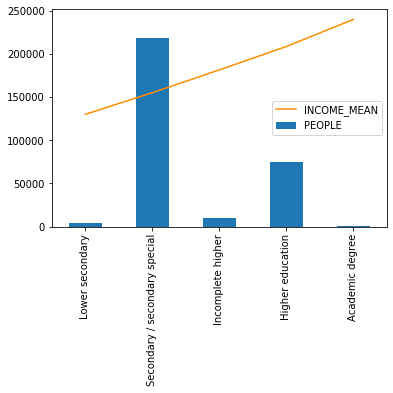

In [7]:
_, ax = plt.subplots()
data.plot(y = ['INCOME_MEAN'], color='darkorange', kind = 'line', ax=ax)
data.plot(y = ['PEOPLE'], kind = 'bar', ax=ax)
plt.show()

1.  從圖表橘色線觀察到，借款人的收入與學歷程正比成長
2. Academic degree 學歷的借款是最少的